In [ ]:
# Eda ideas
# Mark holidays in a year plot, bar plot with holidays in different color


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
files_in_folder = [f for f in os.listdir('.') if os.path.isfile(f)]
print(files_in_folder)

['eda_bike_share_01.ipynb', 'sampleSubmission.csv', 'test.csv', 'train.csv']


In [4]:
# load dataframe
df = pd.read_csv('train.csv')
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [53]:
# Size of dataframe
df.shape
# Unique of column
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [69]:
# Convert datetime to date format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract Year, Month, Day from datetime
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['year_month'] = df['datetime'].dt.to_period('M')
df['year_month_day'] = df['datetime'].dt.to_period('D')

# Create period of the month, p1=days 1-7, p2=days 8-14, p3=day 15-21, p4=days 22-last_day_of_month
df['periond_month'] = pd.cut(df['day'], bins=4, labels=False) + 1

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,year_month,year_month_day,periond_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,2011-01,2011-01-01,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,2011-01,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2011-01,2011-01-01,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,2011-01,2011-01-01,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,2011-01,2011-01-01,1


In [62]:
df.dtypes

datetime          datetime64[ns]
season                     int64
holiday                    int64
workingday                 int64
weather                    int64
temp                     float64
atemp                    float64
humidity                   int64
windspeed                float64
casual                     int64
registered                 int64
count                      int64
year                       int64
month                      int64
day                        int64
year_month             period[M]
year_month_day         period[D]
periond_month              int64
dtype: object

In [35]:
# Get the average weather stats per season
df[['season', 'temp','atemp','humidity','windspeed']].groupby(['season']).mean()

,temp,atemp,humidity,windspeed
season,,,,
1,12.530491,15.228956,56.297841,14.636978
2,22.823483,26.647098,60.852909,13.405607
3,28.789111,32.540783,64.123674,11.508862
4,16.649239,20.059909,66.173738,11.678147


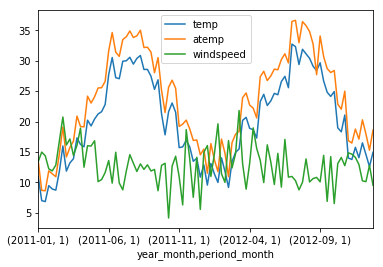

In [84]:
# Plot monthly average of temperature, air temperature and wind speed
weather_plot = df[['year_month','periond_month','temp','atemp','windspeed']]\
.groupby(['year_month','periond_month']).mean().plot()